In [ ]:
%run utilities.ipynb 
load_standard_packages()
from matplotlib.lines import Line2D

Could not find cannot import name 'dopri5' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase\lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'rodas' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase\lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'odassl' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase\lib\site-packages\assimulo\lib\__init__.py)
Could not find ODEPACK functions.
Could not find RADAR5
Could not find GLIMDA.


1.58.0


In [2]:
change_wordir()
import itertools as it
from tqdm import tqdm

In [25]:
analysis = "pfd_dynamics"

colors, colours = colourblind_palette("own")

model = "cyclic_2021"
#model = "cyclic_2021_ODE"
#model = "new_PSI"
#model = "new_PSII"
#model = "new_b6f"
#model = "latest_dev"

m = load_model(model)


succesfully loaded cyclic_2021 :D


In [26]:
# I like to have light as a derived variable
m.add_algebraic_module(module_name = "Light",
    function = lambda X, PFD: PFD, # X is not used
    compounds = ["PQ"], derived_compounds = ["L"], parameters = ['pfd'])

In [27]:
y0 = get_stst_y0(m, pfd=800)

s = Simulator(m)
s.initialise(y0)

In [28]:
def simulate_change(s, y0, param, value1, value2, t_to_0, t_after_0):
    """
    Simulate a change in a parameter from value1 to value2, starting at 0. Change appears at "t_to_0".
    """
    #get steady state
    s.update_parameter(param, value1)
    s.initialise(y0)
    s.simulate_to_steady_state()
    y1 = s.get_new_y0()
    if y1 is None:
        # throw error if steady state not reached
        raise ValueError("Modelbase says NO")

    # include some seconds before change
    s.initialise(y1)
    s.simulate(t_to_0)

    # simulate change
    s.update_parameter(param, value2)
    s.simulate(t_after_0)
    
    return None

# dark to light

In [ ]:
# DARK TO LIGHT TRANSITION

pfd_dark = 30
pfd_light = 1750
t_to_0 = 5
t_after_0 = 100
#t_borders = [0, 100]
t_borders = [4.998, 5.008]
t_dark = [0, 5] #no longer used

simulate_change(s, y0, "pfd", pfd_dark, pfd_light, t_to_0, t_after_0)

c = s.get_full_results_df()

In [30]:
c = checkpoint("c", dir = f"{model}/{analysis}", filename = "c_dark_to_light", overwrite= True)

Overwritten: data/cyclic_2021/pfd_dynamics\c_dark_to_light.joblib,  (backup created at data/cyclic_2021/pfd_dynamics\backup_c_dark_to_light.joblib)


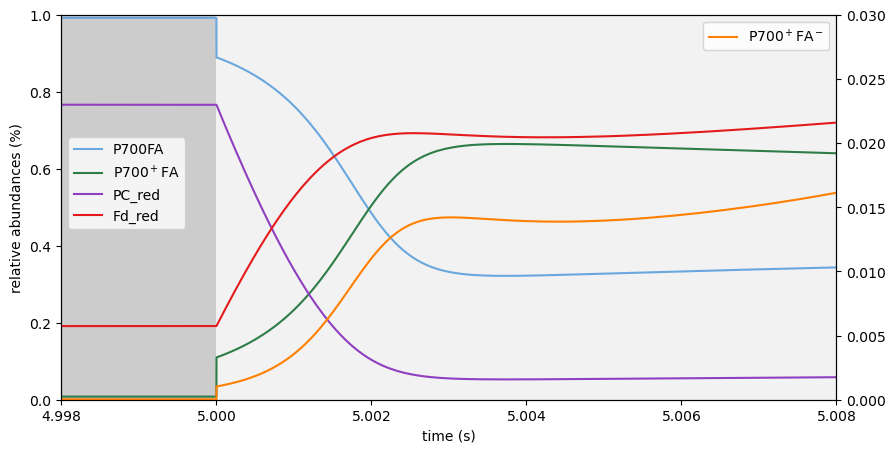

In [31]:
# PLOT PSI STATES

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax2 = ax1.twinx()

ax1.plot(c["rel_P700FA"], label="P700FA", color=colors[0])
ax2.plot(c["rel_P700+FA-"], label="P700$^+$FA$^-$", color=colors[1])
ax1.plot(c["rel_P700+FA"], label="P700$^+$FA", color =colors[2])

if model != "cyclic_2021":
    ax2.plot(c["rel_P700FA-"], label = "P700FA$^{-}$", color=colors[3])

ax1.plot(c["PC_redoxstate"], label="PC_red", color=colors[4])
ax1.plot(c["Fd_redoxstate"], label="Fd_red", color=colors[5])

shade_light(c, (ax1))

ax1.set(xlim=t_borders,
        ylim=(-0.00, 1),
        xlabel=("time (s)"),
        ylabel=("relative abundances (%)"))
ax2.set(ylim=(-0.0, 0.03)
    )

#legends
ax1.legend(loc="upper left", bbox_to_anchor=(0, 0.7))
ax2.legend(loc = "upper right", bbox_to_anchor=(1, 1))


In [8]:
folder = f"figures/{model}/pfd_dynamics/"
zoom = ""
zoom = "_zoom_into_instant"

save_fig(fig, model, analysis, f"PSI_dark_light_{pfd_dark}_{pfd_light}{zoom}")

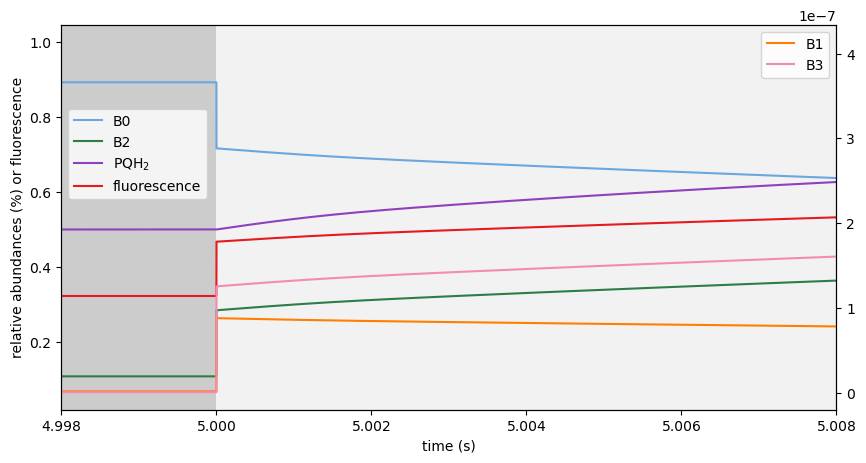

In [32]:
# PLOT PSII STATES

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax2 = ax1.twinx()

ax1.plot(c["rel_B0"], label="B0", color=colors[0])
ax2.plot(c["rel_B1"], label="B1", color=colors[1])
ax1.plot(c["rel_B2"], label="B2", color=colors[2])
ax2.plot(c["rel_B3"], label="B3", color=colors[3])

ax1.plot(c["PQ_redoxstate"], label="PQH$_2$", color=colors[4])
ax1.plot(c["Fluo"]/max(c["Fluo"]), label="fluorescence", color=colors[5])

shade_light(c, (ax1))

ax1.set(xlim=t_borders,
        #ylim=(-0.00, 1),
        xlabel=("time (s)"),
        ylabel=("relative abundances (%) or fluorescence"))
ax2.set()

#legends
ax1.legend(loc="upper left", bbox_to_anchor=(0, 0.8))
ax2.legend(loc = "upper right", bbox_to_anchor=(1, 1))

In [8]:
folder = f"figures/{model}/pfd_dynamics/"
zoom = ""
zoom = "_zoom_into_instant"

save_fig(fig, model, analysis, f"PSII_dark_light_{pfd_dark}_{pfd_light}{zoom}")

# light to dark

In [14]:
# analysing light to dark transition

pfd_dark = 30
pfd_light = 1000
t_to_0 = 5
t_after_0 = 100
#t_borders = [0, 100]
t_borders = [4.998, 5.008]
t_dark = [5, 100]

simulate_change(s, y0, "pfd", pfd_light, pfd_dark, t_to_0, t_after_0)

c = s.get_full_results_df()


In [7]:
c = checkpoint("c", dir = f"{model}/{analysis}", filename = "c_light_to_dark")

Saved: data/latest_dev/pfd_dynamics\c_light_to_dark.joblib


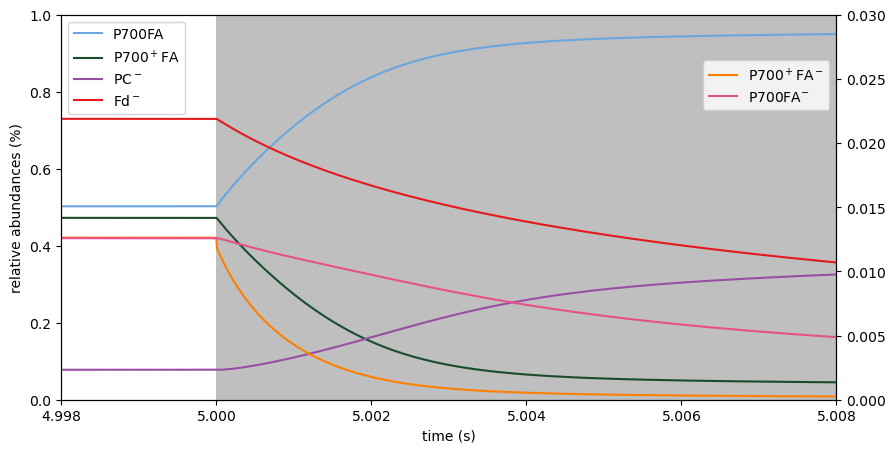

In [11]:
# PLOT PSI STATES

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax2 = ax1.twinx()

ax1.plot(c["rel_P700FA"], label="P700FA", color=colors[0])
ax2.plot(c["rel_P700+FA-"], label="P700$^+$FA$^-$", color=colors[1])
ax1.plot(c["rel_P700+FA"], label="P700$^+$FA", color =colors[2])

if model != "cyclic_2021":
    ax2.plot(c["rel_P700FA-"], label = "P700FA$^{-}$", color=colors[3])

ax1.plot(c["PC_redoxstate"], label="PC$^-$", color=colors[4])
ax1.plot(c["Fd_redoxstate"], label="Fd$^-$", color=colors[5])

ax1.axvspan(t_dark[0], t_dark[1], facecolor='grey', alpha=0.5)

ax1.set(xlim=t_borders,
        ylim=(-0.00, 1),
        xlabel=("time (s)"),
        ylabel=("relative abundances (%)"))
ax2.set(ylim=(-0.0, 0.03)),

#legends
ax1.legend(loc="upper left", bbox_to_anchor=(0, 1))
ax2.legend(loc = "upper right", bbox_to_anchor=(1, 0.9))

In [11]:
folder = f"figures/{model}/pfd_dynamics/"
zoom = ""
zoom = "_zoom_into_instant"

save_fig(fig, model, analysis, f"PSI_light_dark_{pfd_dark}_{pfd_light}{zoom}")

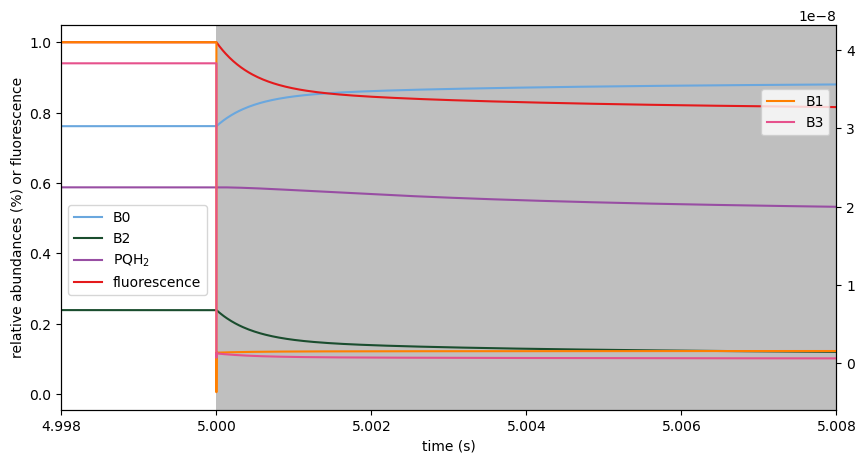

In [9]:
# PLOT PSII STATES

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax2 = ax1.twinx()

ax1.plot(c["rel_B0"], label="B0", color=colors[0])
ax2.plot(c["rel_B1"], label="B1", color=colors[1])
ax1.plot(c["rel_B2"], label="B2", color=colors[2])
ax2.plot(c["rel_B3"], label="B3", color=colors[3])

ax1.plot(c["PQ_redoxstate"], label="PQH$_2$", color=colors[4])
ax1.plot(c["Fluo"]/max(c["Fluo"]), label="fluorescence", color=colors[5])

ax1.axvspan(t_dark[0], t_dark[1], facecolor='grey', alpha=0.5)

ax1.set(xlim=t_borders,
        #ylim=(-0.00, 1),
        xlabel=("time (s)"),
        ylabel=("relative abundances (%) or fluorescence"))

#legends
ax1.legend(loc="upper left", bbox_to_anchor=(0, 0.55))
ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.85))

In [13]:
save_fig(fig, model, analysis, f"PSII_light_dark_{pfd_dark}_{pfd_light}{zoom}")